In [1]:
import math
import time
import timeit
import numpy as np
import anguilla.hypervolume as hv
from anguilla.util import random_cliff_3d

In [2]:
import benchit
benchit.setparams(environ='notebook')

Notebook environment set! Use "fontsize" & "figsize" args with plot method for better viewing experience.


In [3]:
datasets = {}
for n in np.arange(100, 1100, 100):
    front = random_cliff_3d(n)
    nadir = np.max(front, axis=0) + 1e-4
    datasets[n] = (front, nadir)

In [4]:
datasets_b = {}
for n in np.arange(5, 100, 5):
    front = random_cliff_3d(n)
    nadir = np.max(front, axis=0) + 1e-4
    datasets_b[n] = (front, nadir)

In [5]:
def shark_bindings(*args, **kwargs):
    return hv.shark_calculate(*args, **kwargs)

def anguilla_btree(*args, **kwargs):
    return hv.calculate(*args, use_btree=True, **kwargs)

def anguilla_rbtree(*args, **kwargs):
    return hv.calculate(*args, use_btree=False, **kwargs)

implementations = [shark_bindings, anguilla_btree, anguilla_rbtree]

In [6]:
t = benchit.timings(implementations, datasets, multivar=True, input_name='Front size')

<ipython-input-6-954ef3f17fe5>:1: UserWarning: It is multivar, but multiindex is not set with input_name or when specifying inputs.
  t = benchit.timings(implementations, datasets, multivar=True, input_name='Front size')


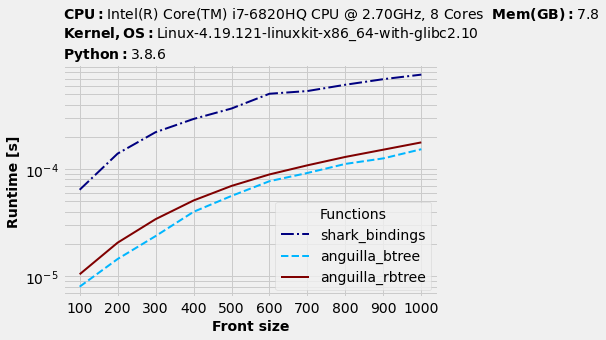

In [7]:
_ = t.plot()

In [8]:
t.speedups(anguilla_rbtree)

Functions   shark_bindings  anguilla_btree  Ref:anguilla_rbtree
Front size                                                     
100               0.162707        1.305990                  1.0
200               0.147528        1.420329                  1.0
300               0.154300        1.438409                  1.0
400               0.173550        1.276146                  1.0
500               0.189537        1.240278                  1.0
600               0.176660        1.156412                  1.0
700               0.202716        1.178933                  1.0
800               0.212061        1.162264                  1.0
900               0.219766        1.205608                  1.0
1000              0.233148        1.158401                  1.0

In [11]:
t_b = benchit.timings(implementations, datasets_b, multivar=True, input_name='Front size')

<ipython-input-11-fba882067522>:1: UserWarning: It is multivar, but multiindex is not set with input_name or when specifying inputs.
  t_b = benchit.timings(implementations, datasets_b, multivar=True, input_name='Front size')


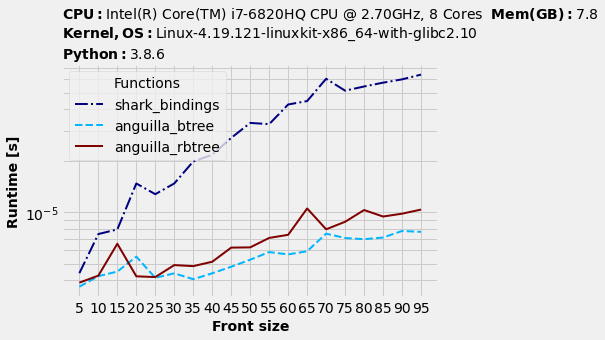

In [12]:
_ = t_b.plot()

In [13]:
t_b.speedups(anguilla_rbtree)

Functions   shark_bindings  anguilla_btree  Ref:anguilla_rbtree
Front size                                                     
5                 0.879835        1.055988                  1.0
10                0.570580        1.007473                  1.0
15                0.824294        1.455759                  1.0
20                0.285906        0.767123                  1.0
25                0.326872        1.010182                  1.0
30                0.332472        1.117904                  1.0
35                0.243558        1.192855                  1.0
40                0.236345        1.168499                  1.0
45                0.227557        1.293983                  1.0
50                0.186561        1.180970                  1.0
55                0.215487        1.210244                  1.0
60                0.172383        1.302734                  1.0
65                0.234824        1.780808                  1.0
70                0.131250        1.0606

In [6]:
def shark_bindings_c(*args, **kwargs):
    return hv.shark_contributions(*args, **kwargs)

def anguilla_btree_c(*args, **kwargs):
    return hv.contributions(*args, use_btree=True, **kwargs)

def anguilla_rbtree_c(*args, **kwargs):
    return hv.contributions(*args, use_btree=False, **kwargs)

implementations_c = [shark_bindings_c, anguilla_btree_c, anguilla_rbtree_c]

In [7]:
t_c = benchit.timings(implementations_c, datasets, multivar=True, input_name='Front size')

<ipython-input-7-eee309f780d5>:1: UserWarning: It is multivar, but multiindex is not set with input_name or when specifying inputs.
  t_c = benchit.timings(implementations_c, datasets, multivar=True, input_name='Front size')


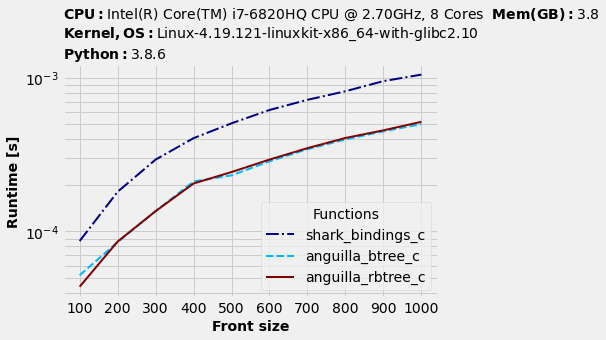

In [8]:
_ = t_c.plot()

In [9]:
t_c.speedups(anguilla_rbtree_c)

Functions   shark_bindings_c  anguilla_btree_c  Ref:anguilla_rbtree_c
Front size                                                           
100                 0.504185          0.842495                    1.0
200                 0.473883          1.008282                    1.0
300                 0.461627          0.999722                    1.0
400                 0.506862          0.970739                    1.0
500                 0.481665          1.050776                    1.0
600                 0.475293          1.026203                    1.0
700                 0.484615          1.016288                    1.0
800                 0.496262          1.021914                    1.0
900                 0.478128          1.015269                    1.0
1000                0.492797          1.033829                    1.0

In [10]:
t_b_c = benchit.timings(implementations_c, datasets_b, multivar=True, input_name='Front size')

<ipython-input-10-f064efd00141>:1: UserWarning: It is multivar, but multiindex is not set with input_name or when specifying inputs.
  t_b_c = benchit.timings(implementations_c, datasets_b, multivar=True, input_name='Front size')


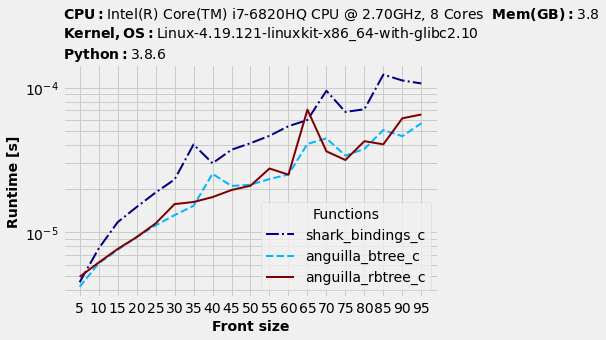

In [11]:
_ = t_b_c.plot()

In [12]:
t_b_c.speedups(anguilla_rbtree_c)

Functions   shark_bindings_c  anguilla_btree_c  Ref:anguilla_rbtree_c
Front size                                                           
5                   1.090413          1.170423                    1.0
10                  0.800342          1.013743                    1.0
15                  0.653253          1.015127                    1.0
20                  0.619108          0.995343                    1.0
25                  0.611801          1.031514                    1.0
30                  0.676115          1.192294                    1.0
35                  0.400583          1.062388                    1.0
40                  0.583932          0.690569                    1.0
45                  0.526949          0.937587                    1.0
50                  0.508127          0.984695                    1.0
55                  0.594622          1.182397                    1.0
60                  0.462539          0.997169                    1.0
65                  

In [20]:
n = 10
rng = np.random.default_rng()
front_3d_a = random_cliff_3d(n, rng=rng)
front_3d_a[:, 2] = np.zeros(n)
# Add some repeated entries.
#dups = front_3d_a[rng.choice(n, 10, replace=False), :]
dom = front_3d_a[rng.choice(n, 7, replace=False), :]
for i in range(7):
    dom[i, rng.integers(0, 2)] += 0.1
front_3d_a = np.vstack([front_3d_a, dom])
#rng.shuffle(tmp)
nadir_3d_a = np.max(front_3d_a, axis=0)
nadir_3d_a[2] = 1.0
front_2d_a = np.delete(front_3d_a, 2, 1)
nadir_2d_a = np.max(front_2d_a, axis=0)

In [21]:
hv.contributions(front_2d_a, nadir_2d_a)

array([ 0.16201971,  0.17642361,  0.        ,  0.42964396,  0.        ,
        0.06344301,  0.52307219,  0.        ,  0.00783456,  0.00941988,
       -0.08930166,  0.        , -0.01353243, -0.05041763,  0.        ,
        0.        ,  0.        ])

In [23]:
hv.contributions(front_2d_a, nadir_2d_a, non_dominated=False)

array([0.16201971, 0.17642361, 0.08930166, 0.42964396, 0.        ,
       0.06344301, 0.52307219, 0.05041763, 0.00783456, 0.02295231,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        ])

In [33]:
hv.contributions(front_3d_a, nadir_3d_a)

array([0.13991329, 0.17642361, 0.        , 0.42964396, 0.        ,
       0.06344301, 0.46106894, 0.        , 0.31656193, 0.02295231,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        ])

In [29]:
hv.shark_contributions(front_3d_a, nadir_3d_a)

array([0.13991329, 0.17642361, 0.08930166, 0.42964396, 0.        ,
       0.06344301, 0.46106894, 0.05041763, 0.00783456, 0.02295231,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        ])

In [31]:
hv.contributions_naive(front_3d_a, nadir_3d_a, duplicates_possible=False)

array([1.39913290e-01, 1.76423612e-01, 8.93016606e-02, 4.29643957e-01,
       1.77635684e-15, 6.34430087e-02, 4.61068945e-01, 5.04176269e-02,
       7.83456046e-03, 2.29523082e-02, 1.77635684e-15, 1.77635684e-15,
       1.77635684e-15, 1.77635684e-15, 1.77635684e-15, 1.77635684e-15,
       1.77635684e-15])

In [38]:
import pygmo as pg
hvinstance = pg.hypervolume(front_3d_a)
hvinstance.contributions(ref_point=nadir_3d_a)

array([0.13991329, 0.17642361, 0.08930166, 0.42964396, 0.        ,
       0.06344301, 0.46106894, 0.05041763, 0.00783456, 0.02295231,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        ])

In [28]:
np.allclose(hv.contributions_naive(front_3d_a, nadir_3d_a, duplicates_possible=False), hv.contributions(front_3d_a, nadir_3d_a))

False

In [27]:
front_2d_a

array([[8.06731687, 5.90917918],
       [9.65539368, 2.60257045],
       [5.9416809 , 8.04340898],
       [8.28838106, 5.59488511],
       [1.43864475, 9.89597399],
       [7.45472999, 6.66535826],
       [6.83469751, 7.29978835],
       [7.5631406 , 6.54208715],
       [1.90109779, 9.81762839],
       [9.71435259, 2.37304736],
       [5.9416809 , 8.14340898],
       [2.00109779, 9.81762839],
       [9.75539368, 2.60257045],
       [7.5631406 , 6.64208715],
       [1.53864475, 9.89597399],
       [7.55472999, 6.66535826],
       [9.81435259, 2.37304736]])

In [ ]:
def random_cliff_3d(n, rng=np.random.default_rng()):
    vs = rng.standard_normal(size=(n, 2))
    ys = np.zeros((n, 3))
    for i in range(n):
        c = np.linalg.norm(vs[i])
        ys[i, 0:2] = 10.0 * np.abs(vs[i]) / c
    ys[:, 2] = rng.uniform(low=0.0, high=10.0, size=n)
    return ys